## **Data Anaysis:Covid-19**

Data Importing

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("/content/country_wise_latest.csv")
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


Data Cleaning

In [11]:
df.shape

(187, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [13]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [16]:
duplicate_rows_data= df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape[0])

Number of duplicate rows:  0


Data Analysis

Total number of Confirmed, Deaths, Recovered and Active cases around the world.

Text(0.5, 1.0, 'Count of Population Status')

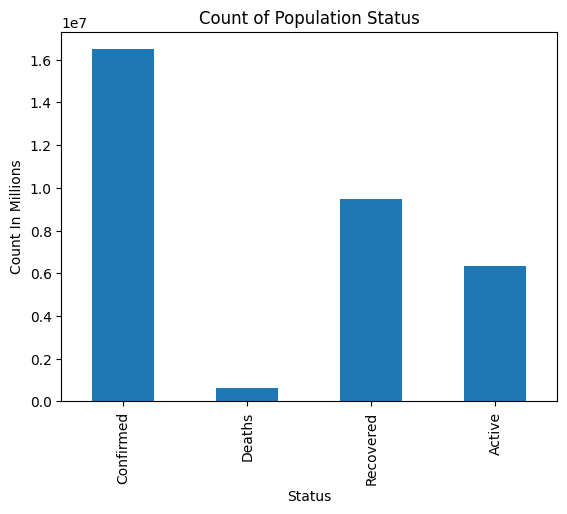

In [19]:
status_count = ['Confirmed', 'Deaths', 'Recovered', 'Active']
column_sums = df[status_count].sum().plot(kind='bar')
plt.xlabel("Status")
plt.ylabel("Count In Millions")
plt.title("Count of Population Status")

Confirmed Cases in each Region

<ipython-input-24-4279815ed28e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Region = df.groupby(by = 'WHO Region').sum()


Text(0, 0.5, 'Count')

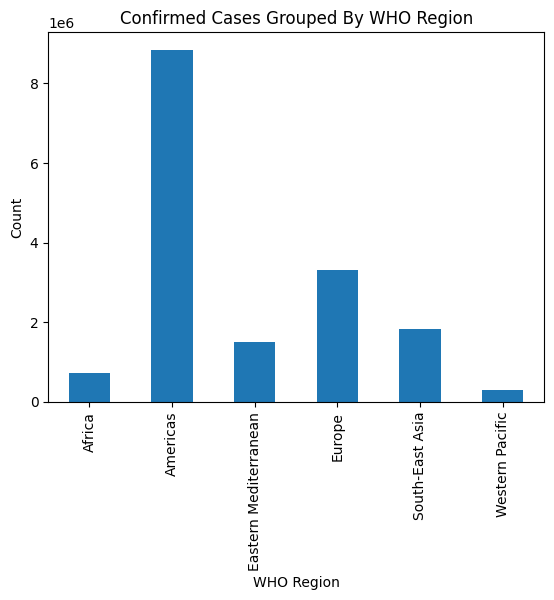

In [24]:
Region = df.groupby(by = 'WHO Region').sum()
Region['Confirmed'].plot(kind='bar')
plt.title('Confirmed Cases Grouped By WHO Region')
plt.ylabel('Count')

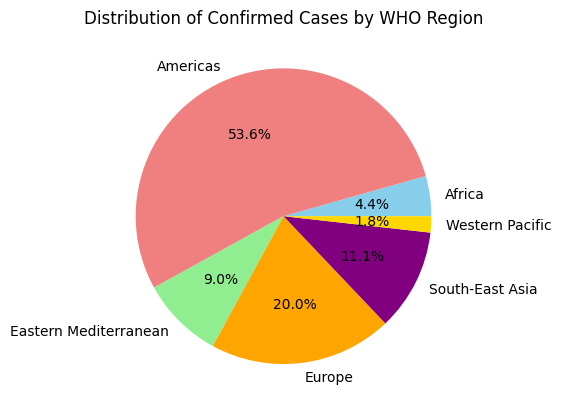

In [25]:
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'purple', 'gold', 'pink']
Region['Confirmed'].plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Confirmed Cases by WHO Region')
plt.ylabel('')
plt.show()

Deaths in each Region

Text(0.5, 1.0, 'Deaths Grouped By WHO Region')

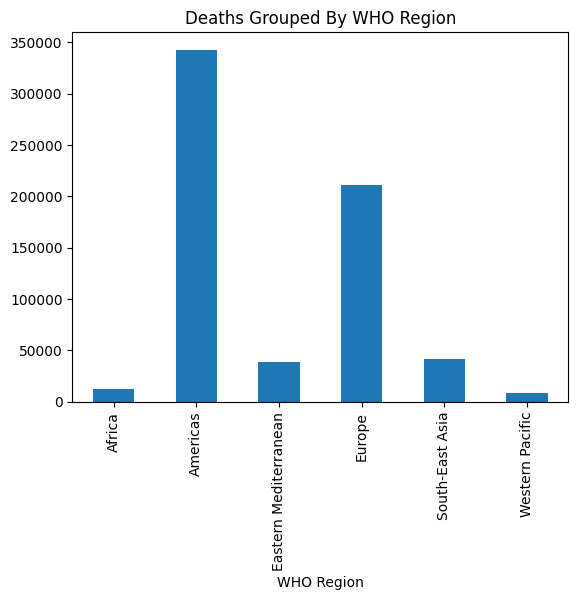

In [26]:
Region['Deaths'].plot(kind='bar')
plt.title('Deaths Grouped By WHO Region')

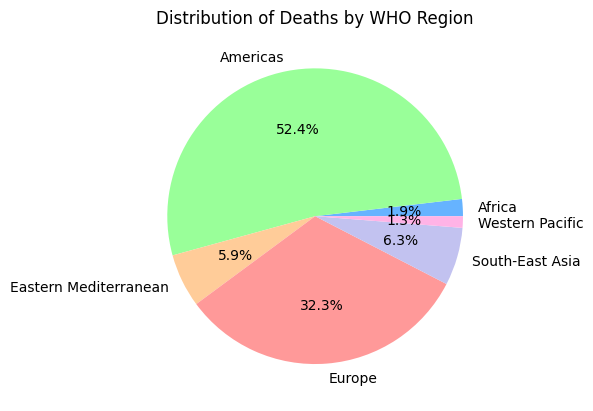

In [27]:
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#c2c2f0', '#ffb3e6', '#ff6666']
Region['Deaths'].plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Deaths by WHO Region')
plt.ylabel('')
plt.show()

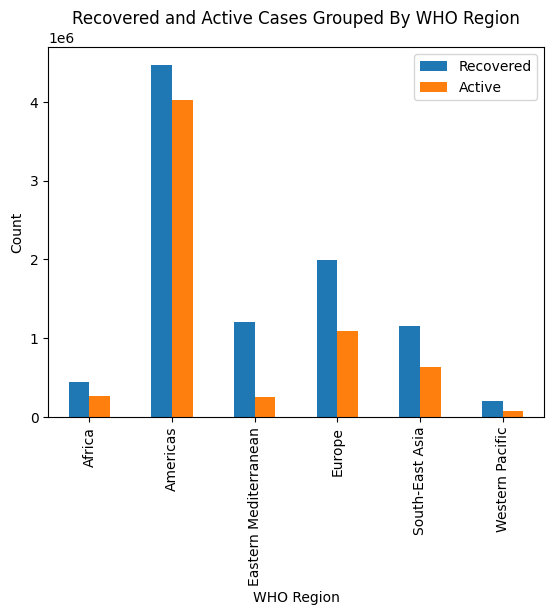

In [29]:
Region[['Recovered', 'Active']].plot(kind='bar')
plt.title('Recovered and Active Cases Grouped By WHO Region')
plt.ylabel('Count')
plt.show()

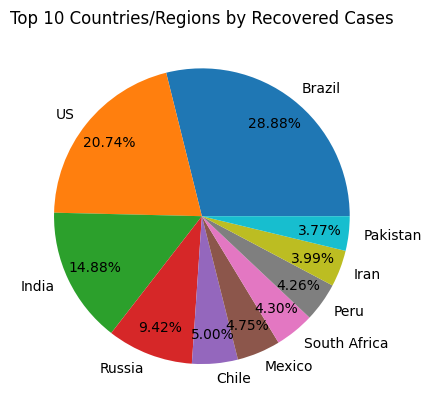

In [33]:
top_recovered = df.sort_values(by='Recovered', ascending=False)[:10]
plt.pie(top_recovered['Recovered'], labels=top_recovered['Country/Region'], autopct="%0.2f%%", pctdistance=0.8)
plt.title('Top 10 Countries/Regions by Recovered Cases')
plt.show()

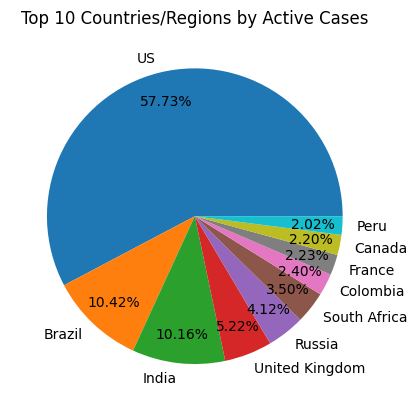

In [35]:
top_active = df.sort_values(by='Active', ascending=False)[:10]
plt.pie(top_active['Active'], labels=top_active['Country/Region'], autopct="%0.2f%%", pctdistance=0.8)
plt.title('Top 10 Countries/Regions by Active Cases')
plt.show()

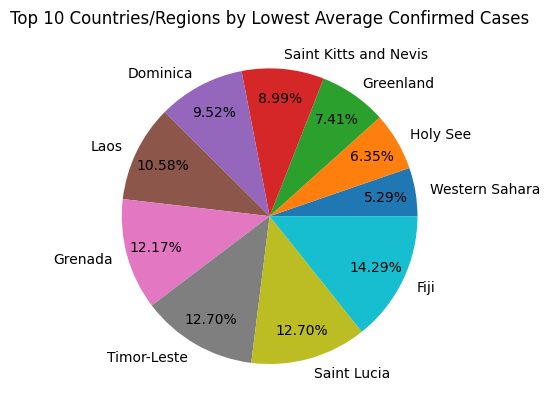

In [37]:
frame1 = df[['Country/Region', 'Confirmed']].groupby('Country/Region').mean().round(2).sort_values(by='Confirmed', ascending=True).reset_index()[0:10]
plt.pie(frame1['Confirmed'], labels=frame1['Country/Region'], autopct="%0.2f%%", pctdistance=0.8)
plt.title('Top 10 Countries/Regions by Lowest Average Confirmed Cases')
plt.show()

Frequency of death cases

<Axes: xlabel='Deaths / 100 Cases', ylabel='Country/Region'>

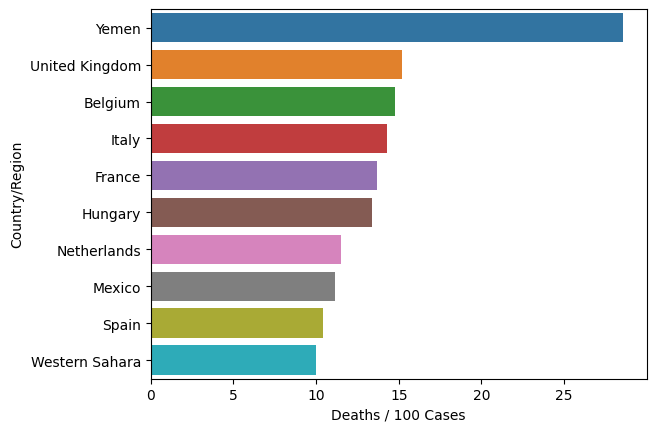

In [38]:
import seaborn as sns
frame= df[['Country/Region', 'Deaths / 100 Cases']].sort_values(by='Deaths / 100 Cases', ascending=False)[0:10]
sns.barplot(y='Country/Region', x='Deaths / 100 Cases', data=frame)

Frequency of recovered cases

<Axes: xlabel='Recovered / 100 Cases', ylabel='Country/Region'>

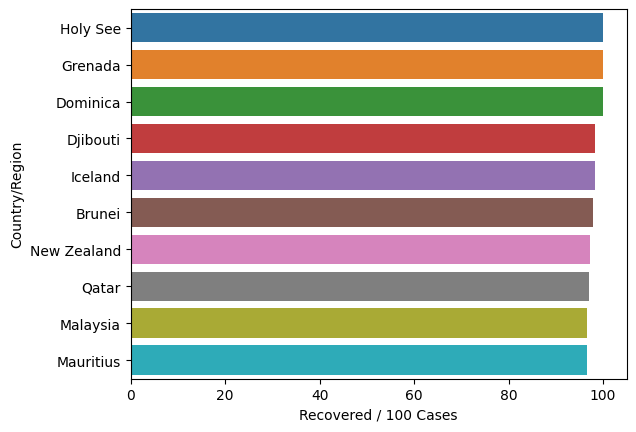

In [42]:
frame= df[['Country/Region', 'Recovered / 100 Cases']].sort_values(by='Recovered / 100 Cases', ascending=False)[0:10]
sns.barplot(y='Country/Region', x='Recovered / 100 Cases', data=frame)

Country that rises in new cases

<Axes: xlabel='New cases', ylabel='Country/Region'>

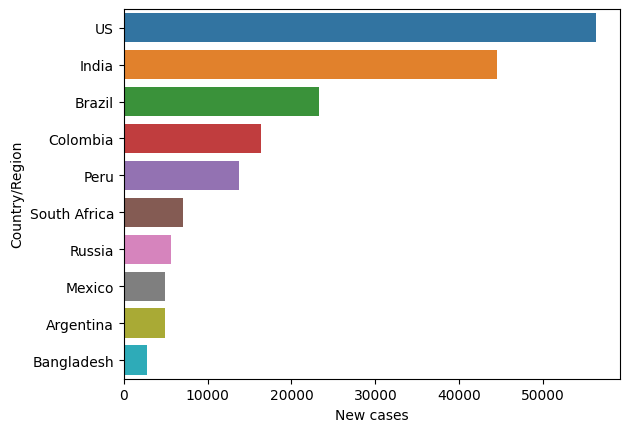

In [44]:
frame=df[['Country/Region', 'New cases']].sort_values(by='New cases', ascending=False)[0:10]
sns.barplot(x='New cases', y='Country/Region', data=frame)